In [2]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD

In [6]:
from tensorflow.keras.utils import to_categorical

In [41]:
import matplotlib.image as mpimg

## 假設分析一張全新照片
* random_pick 一張無處理照片做 img_process 回傳 4 張 crop_img
* 讀取 plt.imread (0~1)

In [52]:
def img_process(img_index):
    crop_imgs = []
    img = plt.imread("./certify/img_%4d.png"%(img_index))[:,:,0]  # 取黑白
    img = 1 - img
    strength = 5
    img = img * float(strength)
    img[img > 1] = 1

    crop_imgs = []
    for x_temp in range(0, 48, 12):
        
        # 裁切區域的 x 與 y 座標（左上角）
        x = x_temp
        y = 0

        # 裁切區域的長度與寬度 (12x12)
        w = 12
        h = 12

        crop_imgs.append(img[y:y+h, x:x+w])
    return crop_imgs

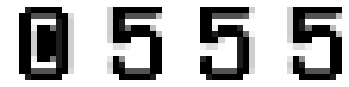

In [53]:
# display the picked image
pick = np.random.randint(0, 1000)
img_clip = img_process(pick)

for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(img_clip[i], cmap='Greys')
    plt.axis("off")

## 載入權重

In [59]:
# model define
model = Sequential([Dense(200, input_dim=144),
                    Activation('relu'),
                    Dense(200),
                    Activation('relu'),
                    Dense(200),
                    Activation('relu'),
                    Dense(10),
                    Activation('softmax'),
                    ])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 200)               29000     
_________________________________________________________________
activation_12 (Activation)   (None, 200)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 200)               40200     
_________________________________________________________________
activation_13 (Activation)   (None, 200)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 200)               40200     
_________________________________________________________________
activation_14 (Activation)   (None, 200)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)               

In [60]:
model.load_weights("Certiy_Recognize.h5")

## Preprocessing

In [69]:
img_clip = np.array(img_clip).reshape(img_clip.shape[0], 144)

In [70]:
img_clip.shape

(4, 144)

## 預測
* 得到一串預測

In [71]:
predict = model.predict_classes(img_clip)

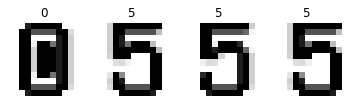

In [73]:
column_len = 4

for i in range(column_len):
    plt.subplot(1,column_len,i+1)
    plt.imshow(img_clip[i].reshape(12, 12), cmap='Greys')
    plt.title(predict[i])
    plt.axis("off")